<h1 style="color: #FECB05; text-align: center;">  Optimizadores </h1>

<h2 style="color: #007ACC;">Autores</h2>

- [Juan Felipe Contreras Alcívar](https://www.linkedin.com/in/juanf-contreras/)

---

<h2 style="color: #007ACC;">Tabla de contenido</h2>

- [<span style="color: #005C99;">Introducción</span>](#introduction)
- [<span style="color: #005C99;">Descenso de gradiente</span>](#dim-curse)
- [<span style="color: #005C99;">Optimizadores basados en momentum </span>](#dim-curse)
- [<span style="color: #005C99;">Referencias</span>](#reference)

---

<h1 style="color: #007ACC;"> Introducción </h1>

La optimización de funciones matemáticas es fundamental en el entrenamiento de redes neuronales artificiales, ya que permite ajustar los pesos y sesgos de la red para minimizar una función de pérdida. Esta función de pérdida evalúa qué tan bien la red está realizando la tarea deseada en un conjunto de datos de entrenamiento. Utilizando algoritmos de optimización como el descenso de gradiente, la red ajusta sus parámetros en cada iteración del entrenamiento para mejorar su desempeño. La optimización busca encontrar los valores óptimos de los parámetros que minimizan la función de pérdida, lo que implica que la red se adapta mejor a los datos de entrenamiento y generaliza bien a datos no vistos. En resumen, la optimización de funciones matemáticas en el contexto de las redes neuronales artificiales es crucial para mejorar su capacidad de aprendizaje y rendimiento en diversas tareas.

En tareas de regresión, típicamente queremos resolver el problema

$$MSE = \frac{1}{N} \sum_{i = 1}^{N} \left( y_{i} - \hat{y}_{i} \right)^{2}$$

- $N$: Número de observaciones

- $y$: variable de respuesta

- $\hat{y}$: predicción de la variable de respuesta

En tareas de clasificación, la función objetivo típicamente es

$$CE = - \frac{1}{N} \sum_{i = 1}^{N} \sum_{j = 1}^{K} y_{ij} log(\hat{y}_{ij})$$

- $N$: Número de observaciones

- $K$: Número de clases

- $y_{ij}$: variable binaria $1$ si la observación $i$ pertenece a la clase $j$, 0 en caso contrario

- $\hat{y}_{ij}$: es la probabilidad predicha de que la observación $i$ pertenezca a la clase $j$

Para ambos casos, el vector $\mathbf{\hat{y}}$ corresponde a una función de los parámetros del modelo utilizado. En el caso de las redes neuronales artificiales, entre más capas ocultas y mayor número de neuronas más complicada es esta función y mayor número de variables tendrá. Y, dado que, usualmente definimos muchas funciones de activación no lineales, la optimización de esta función se complica y debemos contar con algoritmos eficientes para soluciones el problema de optimización.

<h2 style="color: #007ACC;"> Decenso del gradiente </h2>

El problema del descenso de gradiente es un algoritmo de optimización utilizado para encontrar el mínimo global de una función, en nuestro caso, la función de pérdida $L(\mathbf{w})$, donde $\mathbf{w})$ representa los parámetros del modelo que queremos ajustar para minimizar la pérdida. 

El descenso de gradiente se basa en la idea de iterativamente ajustar los parámetros en la dirección opuesta al gradiente de la función de pérdida. El gradiente de una función es un vector que indica la dirección en la cual la función crece más rápidamente. Por lo tanto, al moverse en la dirección opuesta al gradiente, podemos descender hacia un mínimo de la función.

El algoritmo del descenso de gradiente se define de la siguiente manera:

1. Inicializar los parámetros $\mathbf{w}$ con valores aleatorios o algún valor inicial predefinido.
2. Calcular el gradiente de la función de pérdida con respecto a los parámetros $w$: $\nabla_{\mathbf{w}} L(\mathbf{w})$
3. Actualizar los parámetros $\mathbf{w}$ en la dirección opuesta al gradiente multiplicado por una tasa de aprendizaje $\eta$: $\mathbf{w} - \eta \nabla_{\mathbf{w}} L(\mathbf{w})$.
4. Repetir los pasos 2 y 3 hasta que se cumpla un criterio de detención, como alcanzar un número máximo de iteraciones o cuando la mejora en la función de pérdida sea mínima.

Este proceso de actualización de los parámetros se repite iterativamente hasta que se alcanza la convergencia y se encuentra un mínimo local o global de la función de pérdida. La tasa de aprendizaje ($\eta$) es un hiperparámetro que controla la magnitud de los pasos que damos en cada iteración. Un valor demasiado grande puede causar oscilaciones o divergencia, mientras que un valor demasiado pequeño puede hacer que el algoritmo converja lentamente.

Matemáticamente esto se representa así:

Sea $\mathbf{w}^{0}$ el valor inicial de los parámetros del modelo (inicializados aleatoriamente); para $\mathbf{w}^{t}$, $t = 1, 2, 3, ...$  tenemos

$$\mathbf{w}^{t + 1} = \mathbf{w}^{t} - \eta \nabla_{\mathbf{w}} L(\mathbf{w}^{t})$$

In [1]:
from IPython.display import Image, display, HTML
HTML('<img src="../img/GD.gif" />', )

Fuente: Elaboración propia

<h2 style="color: #007ACC;"> Retos del gradiente descendiente </h2>

El gradiente descendiente clásico enfrenta varios desafíos al optimizar funciones complejas, especialmente en problemas donde el espacio de búsqueda está lleno de múltiples mínimos locales. Este método se basa en moverse en la dirección del gradiente para encontrar el punto de menor valor, pero en superficies irregulares y altamente no convexas, puede estancarse en un mínimo local sin llegar al óptimo global. Por ejemplo, al entrenar una red neuronal profunda, donde la función de costo tiene muchos "valles" y "picos", el algoritmo de gradiente descendiente clásico puede detenerse en un mínimo local temprano, resultando en una solución subóptima. Este problema se agrava en modelos con gran cantidad de parámetros, donde el número de mínimos locales aumenta, dificultando encontrar la configuración ideal. Alternativas como el gradiente descendiente con momento o algoritmos de optimización avanzados como Adam intentan mitigar estos problemas agregando inercia o adaptando la tasa de aprendizaje para ayudar a escapar de mínimos locales y mejorar la convergencia hacia soluciones más óptimas.

In [3]:
import matplotlib.pyplot as plt
import numpy as np

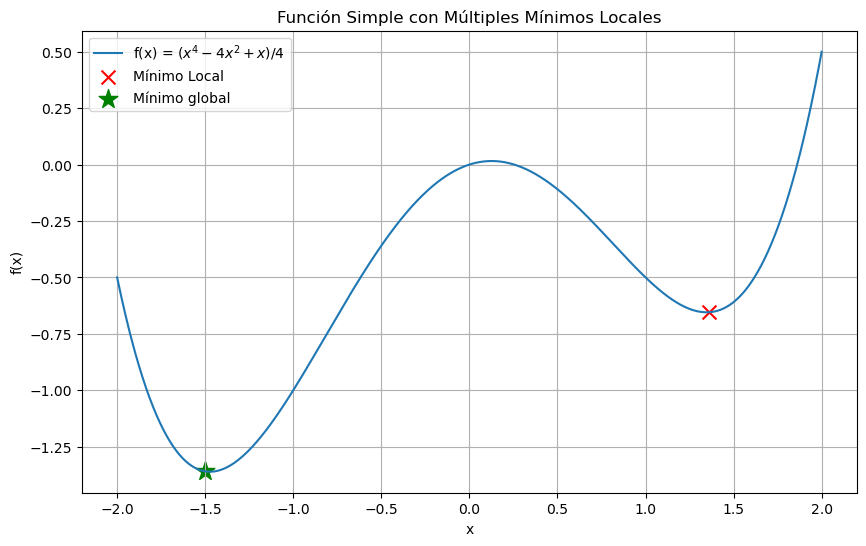

In [57]:
# Definir una función más sencilla con varios mínimos locales sin funciones trigonométricas
def simple_multimin_function(x):
    return (x ** 4 - 4 * x ** 2 + x) / 4

# Generar los valores de x y calcular los valores de la función
x_values = np.linspace(-2, 2, 1000)
y_values = simple_multimin_function(x_values)

# Graficar la función
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label="f(x) = $(x^4 - 4x^2 + x) / 4$")
plt.scatter(1.36, -0.655, marker='x', color="red", s=100, label="Mínimo Local")
plt.scatter(-1.5, -1.36, marker='*', color="green", s=200, label="Mínimo global")
plt.title("Función Simple con Múltiples Mínimos Locales")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()

En la práctica la función de pérdida de las redes neuronales tienen cantidades grandes de mínimos locales.

<h2 style="color: #007ACC;"> Gradiente descendiente estocástico </h2>

En el gradiente descendiente estocástico cambiamos la tasa de aprendizaje en cada una de las epochs, de esta manera podemos evitar mínimos locales.

$$\mathbf{w}^{t + 1} = \mathbf{w}^{t} - \eta_{t} \nabla_{\mathbf{w}} L(\mathbf{w}^{t})$$

$\sum_{t = 1}^{\infty} \eta_{t} = \infty$ y $\sum_{t = 1}^{\infty} \eta^{2}_{t} < \infty$

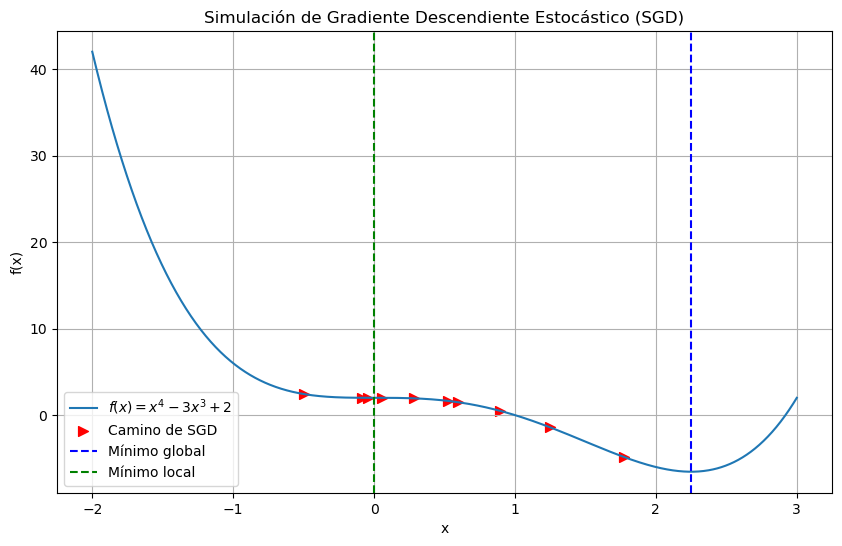

In [90]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la función objetivo con múltiples mínimos locales
def objective_function(x):
    return x**4 - 3 * x**3 + 2

# Derivada de la función (gradiente)
def gradient(x):
    return 4 * x**3 - 9 * x**2

# Implementación del Gradiente Descendiente Estocástico
np.random.seed(0)
x_start = -0.5  # Punto inicial aleatorio
learning_rate_0 = 0.01
epochs = 9
path = [x_start]

x = x_start
for _ in range(1, epochs + 1):
    # Calcular el gradiente en el punto actual
    grad = gradient(x)

    # Actualizar x según el gradiente y la tasa de aprendizaje
    x = x - learning_rate * grad + np.random.normal(0, 0.1)  # Agregar ruido estocástico
    path.append(x)

# Generar valores para la gráfica de la función objetivo
x_values = np.linspace(-2, 3, 1000)
y_values = objective_function(x_values)

# Graficar la función y el camino de la optimización
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label="$f(x) = x^4 - 3x^3 + 2$")
plt.scatter(path, [objective_function(x) for x in path], marker = '>', color="red", s=50, label="Camino de SGD")
#plt.plot(path, [objective_function(x) for x in path], color="red", linestyle="--")
plt.title("Simulación de Gradiente Descendiente Estocástico (SGD)")
plt.xlabel("x")
plt.ylabel("f(x)")

# Añadir líneas verticales en x = 9/4 y x = 0
plt.axvline(x=9/4, color="blue", linestyle="--", label="Mínimo global")
plt.axvline(x=0, color="green", linestyle="--", label="Mínimo local")

plt.legend()
plt.grid(True)
plt.show()

<h2 style="color: #007ACC;"> Gradiente descendiente estocástico por minilotes</h2>

El **algoritmo de gradiente estocástico por mini-lotes** (mini-batch SGD) es una variante del gradiente descendiente que equilibra precisión y eficiencia al calcular el gradiente usando pequeños subconjuntos de datos llamados *mini-lotes*. En lugar de calcular el gradiente en cada iteración usando todo el conjunto de datos (como en el método por lotes) o solo un dato individual (como en el gradiente estocástico clásico), mini-batch SGD selecciona un grupo de ejemplos aleatorios, usualmente entre 16 y 128 ejemplos, para calcular el gradiente y actualizar los parámetros del modelo. Esto permite una convergencia más rápida y estable al reducir la varianza del gradiente y la sobrecarga computacional. Los mini-lotes ayudan a suavizar las oscilaciones del gradiente estocástico clásico y permiten optimizaciones paralelas, mejorando la eficiencia en el entrenamiento de modelos de Machine Learning con grandes conjuntos de datos. Este enfoque es ampliamente utilizado en redes neuronales profundas y otros modelos de alto rendimiento debido a su capacidad para escalar y lograr un buen balance entre la velocidad de convergencia y la estabilidad del proceso de optimización.

La actualización de los parámetros en el **gradiente estocástico por mini-lotes** se define de la siguiente manera:

$$\theta_{t + 1} = \theta_{t} - \eta_{t} \cdot \frac{1}{m} \sum_{i=1}^{m} \nabla_{\theta} J(\theta; x^{(t)}, y^{(t)})$$ 

en dónde $t$ es el t-ésimo minilote.

En este algoritmo, el gradiente se promedia sobre el mini-lote de \( m \) ejemplos, lo cual suaviza la dirección de actualización y mejora la estabilidad en comparación con el gradiente descendiente estocástico clásico, que usa solo un ejemplo en cada iteración.

<h2 style="color: #007ACC;"> Optimizadores basados en momentum </h1>

Los optimizadores basados en *momentum* son una extensión del algoritmo de Gradiente Descendente que mejoran la velocidad y estabilidad del entrenamiento al considerar el "historial" de los gradientes pasados. En lugar de actualizar los pesos únicamente en función del gradiente actual, estos optimizadores acumulan un "momentum", similar al impulso en física, que es una fracción de los gradientes de las iteraciones anteriores. Esto permite que el modelo avance más rápido en direcciones donde los gradientes son consistentes y evita oscilaciones cuando los gradientes cambian de dirección. Este enfoque es particularmente útil para navegar superficies de error complicadas o con mínimos locales, ya que el momentum permite que el optimizador mantenga la inercia en una dirección favorable, suavizando y acelerando el descenso.

Los optimizadores basados en *momentum* ofrecen varias ventajas en comparación con los optimizadores convencionales de descenso de gradiente. La principal ventaja es su capacidad para acelerar el proceso de convergencia, especialmente en problemas con superficies de error irregulares o con múltiples mínimos locales. Al acumular un "impulso" a partir de los gradientes de iteraciones anteriores, estos optimizadores avanzan con mayor velocidad en direcciones consistentes, reduciendo el riesgo de quedar atrapados en mínimos locales o de experimentar oscilaciones en direcciones donde los gradientes cambian de signo. Esto es particularmente beneficioso en redes neuronales profundas, donde las pendientes pueden volverse muy planas y el entrenamiento puede volverse lento. Además, el momentum ayuda a reducir las fluctuaciones del gradiente en direcciones menos importantes, lo que estabiliza el proceso de entrenamiento y permite tasas de aprendizaje más altas sin comprometer la estabilidad.

Así, definimos la velocidad con la que navegamos la superficie de la función de error, $v$, así:

$$v_{t} = \lambda v_{t - 1} + \eta \nabla_{\theta} J(\theta; x^{(i)}, y^{(i)})$$

Y, actualizamos los parámetros así:

$$\theta_{t} = \theta_{t - 1} + v_{t}$$

<h2 style="color: #007ACC;"> RMSProp</h2>

1. **Cálculo de la media acumulada del cuadrado de los gradientes**:

   $$E[g^2]_t = \beta \cdot E[g^2]_{t-1} + (1 - \beta) \cdot g_t^2$$

   Aquí:
   - $E[g^2]_t$ representa la media acumulada del cuadrado de los gradientes en el paso $t$.
   - $\beta$ es el factor de decaimiento, típicamente cercano a 0.9.
   - $g_t$ es el gradiente del parámetro en el paso \( t \).

2. **Actualización del parámetro con la tasa de aprendizaje ajustada**:

   $$\theta_{t+1} = \theta_t - \frac{\eta}{\sqrt{E[g^2]_t + \epsilon}} \cdot g_t$$

   Donde:
   - $\theta_{t+1}$ es el valor actualizado del parámetro en el paso $t+1$.
   - $\eta$ es la tasa de aprendizaje.
   - $\epsilon$ es un valor pequeño (por ejemplo, \( 10^{-8} \)) que se añade para evitar divisiones por cero.
   - $\sqrt{E[g^2]_t + \epsilon}$ actúa como un factor de ajuste de la tasa de aprendizaje, haciendo que los parámetros cambien más o menos según la variabilidad de los gradientes.

Estas ecuaciones permiten que RMSProp ajuste la tasa de aprendizaje de manera adaptativa, haciendo que el optimizador sea más estable y eficiente en la convergencia, especialmente en problemas donde los gradientes varían significativamente entre parámetros o direcciones.

<h2 style="color: #007ACC;"> AdaGrad </h2>

Las ecuaciones principales de AdaGrad son las siguientes:

1. **Acumulación del cuadrado de los gradientes**:

   $$G_t = G_{t-1} + g_t^2$$

   Aquí:
   - $G_t$ es la suma acumulativa del cuadrado de los gradientes hasta el paso $t$.
   - $g_t$ es el gradiente del parámetro en el paso $t$.

2. **Actualización de los parámetros**:

   $$\theta_{t+1} = \theta_t - \frac{\eta}{\sqrt{G_t + \epsilon}} \cdot g_t$$

   Donde:
   - $\theta_{t+1}$ es el valor actualizado del parámetro en el paso $t+1$.
   - $\eta$ es la tasa de aprendizaje inicial.
   - $\epsilon$ es un valor pequeño (por ejemplo, $10^{-8}$ ) que se añade para evitar divisiones por cero.
   - $\sqrt{G_t + \epsilon}$ actúa como un factor de ajuste de la tasa de aprendizaje, reduciendo su valor a medida que el cuadrado acumulado de los gradientes $G_t$ aumenta.

Estas ecuaciones permiten que AdaGrad adapte la tasa de aprendizaje de cada parámetro de acuerdo con la acumulación de gradientes anteriores, reduciendo la tasa para los parámetros que ya han experimentado grandes cambios y manteniendo una mayor tasa para aquellos menos afectados. Esto es particularmente útil para problemas de alta dimensionalidad y con datos dispersos.

<h2 style="color: #007ACC;"> Adam </h2>

1. **Media acumulativa de los gradientes (primer momento)**:

   $$m_t = \beta_1 \cdot m_{t-1} + (1 - \beta_1) \cdot g_t$$

2. **Media acumulativa del cuadrado de los gradientes (segundo momento)**:

   $$v_t = \beta_2 \cdot v_{t-1} + (1 - \beta_2) \cdot g_t^2$$

3. **Corrección de sesgo para \( m_t \) y \( v_t \)**:

   $$\hat{m}_t = \frac{m_t}{1 - \beta_1^t}$$

   
   $$\hat{v}_t = \frac{v_t}{1 - \beta_2^t}$$

3. **Actualización de los parámetros**:

   $$\theta_{t+1} = \theta_t - \frac{\eta}{\sqrt{\hat{v}_t} + \epsilon} \cdot \hat{m}_t$$

Donde:
- $m_t$ y $v_t$ son las medias acumulativas de primer y segundo momento.
- $\beta_1$ y $\beta_2$ son factores de decaimiento típicamente cercanos a 0.9 y 0.999, respectivamente.
- $g_t$ es el gradiente en el paso $t$.
- $\hat{m}_t$ y $\hat{v}_t$ son las versiones corregidas de sesgo de $m_t$ y $v_t$.
- $\eta$ es la tasa de aprendizaje inicial.
- $\epsilon$ es un pequeño valor (por ejemplo, $10^{-8}$) para evitar divisiones por cero.

Adam es robusto y efectivo en una gran variedad de tareas de aprendizaje profundo, adaptándose bien a gradientes ruidosos y garantizando una convergencia más estable que otros métodos.

<h1 style="color: #007ACC;"> Referencias </h1>

- Capítulo 4 del libro Hands-On Machine Learning with Scikit-Learn, Keras & Tensorflow, de Aurélien Géron. Repositorio disponible en: https://github.com/ageron/handson-ml3/tree/main

- Capítulo 4 del libro Fundamentals of Deep Learning de Nikhil Buduma.

- Sección de Matemáticas y Estadística de la IA del Diplomado IA y AP - Avanzado de la Universidad Nacional y la empresa Aprendizaje Profundo, dictado por los expertos Álvaro Montenegro Díaz y Daniel Montenegro Reyes. Repositorio disponible en: https://github.com/AprendizajeProfundo/Diplomado